# Repurposing Competition 数据集分析

这个notebook用于分析repurposing_competition数据集。该数据集包含从竞争编程问题生成的描述性文本，用于训练视觉语言模型理解算法和数据结构相关图像。

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置数据集路径
DATASET_PATH = "/Users/jia/datasets/data/repurposing_competition/train"

print("正在检查数据集...")
if not os.path.exists(DATASET_PATH):
    print(f"错误: 数据集路径 {DATASET_PATH} 不存在")
else:
    print(f"数据集路径: {DATASET_PATH}")

正在检查数据集...
数据集路径: /Users/jia/datasets/data/repurposing_competition/train


In [2]:
# 列出所有数据文件
files = os.listdir(DATASET_PATH)
parquet_files = [f for f in files if f.endswith(".parquet")]

print(f"\n数据文件总数: {len(files)}")
print(f"Parquet文件数量: {len(parquet_files)}")
print(f"\n前10个文件:")
for file in parquet_files[:10]:
    print(f"  - {file}")


数据文件总数: 244
Parquet文件数量: 244

前10个文件:
  - train-00082-of-00337.parquet
  - train-00064-of-00337.parquet
  - train-00163-of-00337.parquet
  - train-00185-of-00337.parquet
  - train-00202-of-00337.parquet
  - train-00001-of-00337.parquet
  - train-00138-of-00337.parquet
  - train-00106-of-00337.parquet
  - train-00127-of-00337.parquet
  - train-00119-of-00337.parquet


In [3]:
# 加载第一个parquet文件
if parquet_files:
    first_file = os.path.join(DATASET_PATH, parquet_files[0])
    print(f"\n正在加载文件: {first_file}")
    try:
        df = pd.read_parquet(first_file)
        print(f"数据集形状: {df.shape}")
        print(f"列名: {list(df.columns)}")
    except Exception as e:
        print(f"加载文件时出错: {e}")
        print("请确保已安装pyarrow库: pip install pyarrow")


正在加载文件: /Users/jia/datasets/data/repurposing_competition/train/train-00082-of-00337.parquet


数据集形状: (12680, 4)
列名: ['id', 'code', 'caption', 'image']


In [4]:
# 显示数据集基本信息
if 'df' in locals():
    print("\n数据集基本信息:")
    df.info()


数据集基本信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12680 entries, 0 to 12679
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       12680 non-null  object
 1   code     12680 non-null  object
 2   caption  12680 non-null  object
 3   image    12680 non-null  object
dtypes: object(4)
memory usage: 396.4+ KB


In [5]:
# 显示数据集前5行
if 'df' in locals():
    print("\n数据集前5行:")
    display(df.head())


数据集前5行:


,id,code,caption,image
0,seed123_depth1_node42_new63,a b c = triangle a b c; d = circle d a b c; e ...,Construct triangle $ABC$.\nConstruct point $D$...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...
1,seed117_depth1_node102_new132,a b c = triangle a b c; d = parallelogram a b ...,Construct triangle $ABC$.\nConstruct $D$ such ...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...
2,seed63_depth1_node118_new104,a b = segment a b; c = midpoint c b a; d = on_...,"Construct two distinct points $A,B$.\nConstruc...",{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...
3,seed31_depth1_node118_new44,a b c = triangle a b c; d = circle d a b c; e ...,Construct triangle $ABC$.\nConstruct point $D$...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...
4,seed32_depth1_node18_new65,a b c = triangle a b c; d = parallelogram a b ...,Construct triangle $ABC$.\nConstruct $D$ such ...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...


In [6]:
# 检查数据集中的缺失值
if 'df' in locals():
    print("\n缺失值统计:")
    print(df.isnull().sum())


缺失值统计:
id         0
code       0
caption    0
image      0
dtype: int64



caption长度统计:
count    12680.000000
mean       391.888249
std         80.379577
min        191.000000
25%        338.000000
50%        385.000000
75%        438.000000
max        762.000000
Name: caption_length, dtype: float64


/Users/jia/workspace/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jia/workspace/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jia/workspace/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jia/workspace/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jia/workspace/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20998

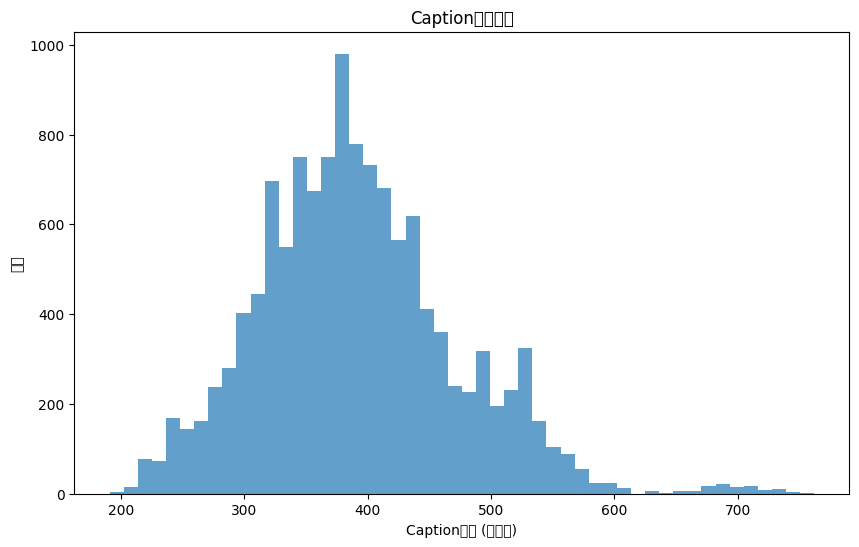

In [7]:
# 分析caption的长度（如果存在caption列）
if 'df' in locals() and 'caption' in df.columns:
    df['caption_length'] = df['caption'].str.len()
    
    print("\ncaption长度统计:")
    print(df['caption_length'].describe())
    
    # 绘制caption长度分布直方图
    plt.figure(figsize=(10, 6))
    plt.hist(df['caption_length'], bins=50, alpha=0.7)
    plt.title('Caption长度分布')
    plt.xlabel('Caption长度 (字符数)')
    plt.ylabel('频次')
    plt.show()
elif 'df' in locals() and 'text' in df.columns:
    df['text_length'] = df['text'].str.len()
    
    print("\ntext长度统计:")
    print(df['text_length'].describe())
    
    # 绘制text长度分布直方图
    plt.figure(figsize=(10, 6))
    plt.hist(df['text_length'], bins=50, alpha=0.7)
    plt.title('Text长度分布')
    plt.xlabel('Text长度 (字符数)')
    plt.ylabel('频次')
    plt.show()
else:
    print("\n未找到caption或text列")

In [8]:
# 显示一些样本数据
print("\n样本数据:")
if 'df' in locals():
    sample_size = min(5, len(df))
    sample_df = df.sample(n=sample_size, random_state=42)
    
    for i in range(len(sample_df)):
        print(f"\n样本 {i+1}:")
        row = sample_df.iloc[i]
        
        # 显示ID（如果存在）
        if 'id' in row:
            print(f"  ID: {row['id']}")
        
        # 显示文本内容
        text_columns = ['caption', 'text', 'description']
        for col in text_columns:
            if col in row:
                text = row[col]
                if isinstance(text, str):
                    print(f"  {col}: {text[:300]}{'...' if len(text) > 300 else ''}")
                break
        
        # 显示图像信息
        if 'image' in row:
            image = row['image']
            if image is not None and not (isinstance(image, (list, np.ndarray)) and len(image) == 0):
                print(f"  图像信息: 存在")
            else:
                print(f"  图像信息: 不存在")


样本数据:

样本 1:
  ID: seed78_depth1_node30_new89
  caption: Construct triangle $ABC$.
Draw parallel lines for $BC$ through point $A$, parallel lines for $AB$ through point $C$, and the intersection of the two parallel lines is point $D$.
Construct $E$ as the intersection point of $AC$ and $BD$.
Construct $F$ on line $AC$ and such that $AE$ = $AF$.
Construct ...
  图像信息: 存在

样本 2:
  ID: seed30_depth1_node64_new56
  caption: Construct triangle $ABC$.
Construct $D$ as the foot of $B$ on $AC$.
Construct $E$ as the foot of $C$ on $AB$.
Construct point $F$ as the circumcenter of $B$, $C$, $A$.
Construct $G$ on line $FA$ such that $FG$ = $FA$.
Construct $H$ as the intersection of line $BD$ and line $CE$.
Construct $I$ as the...
  图像信息: 存在

样本 3:
  ID: seed20_depth1_node113_new130
  caption: Construct two distinct points $A,B$.
Construct $C$ such that $CB$ is perpendicular to $AB$.
Construct $D$ such that $AB$ = $AD$.
Construct $E$ on line $CD$ and such that $AB$ = $AE$.
Construct $F$ as the midp

In [9]:
# 显示样本数据中的详细信息
print("\n详细样本数据展示:")
if 'df' in locals():
    sample_size = min(3, len(df))
    sample_df = df.sample(n=sample_size, random_state=42)
    
    for i in range(len(sample_df)):
        print(f"\n{'='*60}")
        print(f"样本 {i+1}")
        print(f"{'='*60}")
        row = sample_df.iloc[i]
        
        # 显示所有字段
        for col in df.columns:
            if col != 'image':  # 单独处理图像
                value = row[col]
                print(f"{col}: {str(value)[:500]}{'...' if len(str(value)) > 500 else ''}")
                if len(str(value)) > 500:
                    print(f"(总长度: {len(str(value))} 字符)")
        
        # 显示图像信息
        if 'image' in row:
            image = row['image']
            print(f"\nImage (图像信息):")
            print("-" * 15)
            if image is not None and not (isinstance(image, (list, np.ndarray)) and len(image) == 0):
                if isinstance(image, dict):
                    print(f"图像数据类型: 字典")
                    print(f"键值: {list(image.keys())}")
                    for key, value in image.items():
                        if isinstance(value, (list, np.ndarray)):
                            print(f"  {key}: 数组, 形状 {np.array(value).shape}")
                        else:
                            print(f"  {key}: {type(value).__name__}, 值: {str(value)[:100]}{'...' if len(str(value)) > 100 else ''}")
                elif isinstance(image, (list, np.ndarray)):
                    arr = np.array(image)
                    print(f"图像数据类型: 数组")
                    print(f"形状: {arr.shape}")
                    print(f"数据类型: {arr.dtype}")
                    if arr.size > 0:
                        print(f"数值范围: {arr.min()} 到 {arr.max()}")
                else:
                    print(f"图像数据类型: {type(image).__name__}")
                    print(f"值: {str(image)[:200]}{'...' if len(str(image)) > 200 else ''}")
            else:
                print("图像数据不存在或为空")


详细样本数据展示:

样本 1
id: seed78_depth1_node30_new89
code: a b c = triangle a b c; d = intersection_pp d a b c c a b; e = intersection_ll e a c b d; f = on_line f a c, on_circle f a e; g = on_circle g e f, on_circle g f e ? cong a e e c
caption: Construct triangle $ABC$.
Draw parallel lines for $BC$ through point $A$, parallel lines for $AB$ through point $C$, and the intersection of the two parallel lines is point $D$.
Construct $E$ as the intersection point of $AC$ and $BD$.
Construct $F$ on line $AC$ and such that $AE$ = $AF$.
Construct $G$ such that $EF$ = $EG$ and $FE$ = $FG$.
caption_length: 342

Image (图像信息):
---------------
图像数据类型: 字典
键值: ['bytes', 'path']
  bytes: bytes, 值: b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x00\x00\x00\x02\x00\x08\x06\x00\x00\x00\xf4x\xd4\x...
  path: NoneType, 值: None

样本 2
id: seed30_depth1_node64_new56
code: a b c = triangle a b c; d = foot d b a c; e = foot e c a b; f = circumcenter f b c a; g = intersection_lc g f f a; h = on_line h b d, on_lin

In [10]:
# 添加数据统计信息
print("\n数据统计信息:")
print("="*50)
if 'df' in locals():
    print(f"总样本数: {len(df)}")
    
    # 文本长度统计
    text_columns = ['caption', 'text', 'description']
    for col in text_columns:
        if col in df.columns:
            df[f'{col}_length'] = df[col].str.len()
            print(f"\n{col}长度统计:")
            print(f"  平均长度: {df[f'{col}_length'].mean():.2f} 字符")
            print(f"  最小长度: {df[f'{col}_length'].min()} 字符")
            print(f"  最大长度: {df[f'{col}_length'].max()} 字符")
            print(f"  长度中位数: {df[f'{col}_length'].median()} 字符")
            break
    
    # 图像数据统计
    if 'image' in df.columns:
        # 统计有图像数据的样本数
        has_image = df['image'].apply(lambda x: x is not None and not (isinstance(x, (list, np.ndarray)) and len(x) == 0))
        count_with_image = has_image.sum()
        print(f"\n图像数据统计:")
        print(f"  有图像数据的样本数: {count_with_image}")
        print(f"  无图像数据的样本数: {len(df) - count_with_image}")
        print(f"  图像数据覆盖率: {count_with_image/len(df)*100:.2f}%")
    
    # 显示各列的数据类型
    print(f"\n各列数据类型:")
    for col in df.columns:
        print(f"  {col}: {df[col].dtype}")


数据统计信息:
总样本数: 12680

caption长度统计:
  平均长度: 391.89 字符
  最小长度: 191 字符
  最大长度: 762 字符
  长度中位数: 385.0 字符

图像数据统计:
  有图像数据的样本数: 12680
  无图像数据的样本数: 0
  图像数据覆盖率: 100.00%

各列数据类型:
  id: object
  code: object
  caption: object
  image: object
  caption_length: int64


In [11]:
# 数据集总结
print("\n数据集总结:")
print("="*50)

if 'parquet_files' in locals():
    print(f"总文件数: {len(parquet_files)}")
    
if 'df' in locals():
    print(f"当前加载文件的样本数: {len(df)}")
    print(f"列名: {list(df.columns)}")

print("="*50)
print("分析完成")


数据集总结:
总文件数: 244
当前加载文件的样本数: 12680
列名: ['id', 'code', 'caption', 'image', 'caption_length']
分析完成
